In [ ]:
"""
from keras.layers.core import Lambda
import numpy as np
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
"""

In [4]:
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

!pip install scikeras
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import Normalizer
#from keras.wrappers.scikit_learn import KerasClassifier

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


# Working Directory

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/data/data_ready/np_data
!pwd

/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/data/data_ready/np_data
/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/data/data_ready/np_data


In [5]:
%cd /content/drive/MyDrive/ADVML
!pwd

[Errno 2] No such file or directory: '/content/drive/MyDrive/ADVML'
/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/data/data_ready/np_data
/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/data/data_ready/np_data


# Road the data

In [8]:
data = np.load("X_data.npy", allow_pickle=True)

In [9]:
print(data.shape)
print(data.dtype)

(19470, 12588)
float32


# Impute the NAs from Mean

In [10]:
#print(np.max(data[:, 12288:])
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data[:, 12288:])
data[:, 12288:] = imp.transform(data[:, 12288:])

print(np.min(data[:, 12288:]))
print(np.max(data[:, 12288:]))

-0.45410156
0.4814453


In [11]:
fake = np.zeros((9720, 1))
real = np.ones((9750, 1))
label = np.concatenate((fake, real), axis = 0)
print(label.shape)

(19470, 1)


# Split the Data to 80 % of Train and 20 % of Test

In [12]:
train_X, valid_X, train_label, valid_label = train_test_split(data, label, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape)
print(valid_X.shape)
print(train_label.shape)
print(valid_label.shape)

(15576, 12588)
(3894, 12588)
(15576, 1)
(3894, 1)


# Grid Search Epochs and Batch Size

In [116]:
def deepLearning_model():
	# create model
  model = Sequential()
  model.add(Dense(8192, input_dim = len(train_X[1]), activation='relu')) # input_dim = one-dimensional flattened arrays,
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(Dense(4096,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(Dense(1024))
  model.add(Dense(512, activation='sigmoid'))
  model.add(Dense(256, activation='softmax'))
  model.add(Dense(64))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', 
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      metrics=['accuracy'])
  return model

np.random.seed(1234)
model = KerasClassifier(build_fn = deepLearning_model, verbose=1)

# define the grid search parameters
batch_size = [64, 128]
epochs = [10, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_X, train_label)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

KeyboardInterrupt: ignored

In [ ]:
grid_result.best_estimator_

In [ ]:
grid_result.best_params_

In [14]:
np.random.seed(1234)
batch_size = 64
epochs = 50

In [15]:
fashion_model = Sequential()
fashion_model.add(Dense(8192, input_dim = len(train_X[1]), activation='relu')) # input_dim = one-dimensional flattened arrays,
fashion_model.add(tf.keras.layers.Dropout(0.5))
fashion_model.add(Dense(4096,activation='relu'))
fashion_model.add(tf.keras.layers.Dropout(0.5))
fashion_model.add(Dense(1024))
fashion_model.add(Dense(512, activation='sigmoid'))
fashion_model.add(Dense(256, activation='softmax'))
fashion_model.add(Dense(64))
fashion_model.add(Dense(1, activation='sigmoid'))

In [16]:
fashion_model.compile(loss='binary_crossentropy', 
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      metrics=['accuracy'])

In [17]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8192)              103129088 
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              33558528  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              4195328   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               1

In [18]:
#data = tf.convert_to_tensor(data, dtype=tf.float32)
fashion_train = fashion_model.fit(train_X, train_label,
                                  batch_size=batch_size,epochs=epochs,
                                  verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/50
244/244 [==============================] - 386s 2s/step - loss: 0.6775 - accuracy: 0.5928 - val_loss: 0.6475 - val_accuracy: 0.6685
Epoch 2/50
244/244 [==============================] - 376s 2s/step - loss: 0.6435 - accuracy: 0.6558 - val_loss: 0.6287 - val_accuracy: 0.6723
Epoch 3/50
244/244 [==============================] - 376s 2s/step - loss: 0.6160 - accuracy: 0.6846 - val_loss: 0.5779 - val_accuracy: 0.7319
Epoch 4/50
244/244 [==============================] - 376s 2s/step - loss: 0.5875 - accuracy: 0.7073 - val_loss: 0.5655 - val_accuracy: 0.7275
Epoch 5/50
244/244 [==============================] - 375s 2s/step - loss: 0.5744 - accuracy: 0.7163 - val_loss: 0.5357 - val_accuracy: 0.7524
Epoch 6/50
244/244 [==============================] - 374s 2s/step - loss: 0.5567 - accuracy: 0.7300 - val_loss: 0.5654 - val_accuracy: 0.7083
Epoch 7/50
244/244 [==============================] - 377s 2s/step - loss: 0.5323 - accuracy: 0.7476 - val_loss: 0.4994 - val_accuracy: 0.7763

## Training and Testing Scores

In [19]:
# evaluate the keras model
train_eval = fashion_model.evaluate(train_X, train_label, verbose=1)
print('Test loss:', train_eval[0])
print('Test accuracy:', train_eval[1])

487/487 [==============================] - 142s 291ms/step - loss: 0.2609 - accuracy: 0.8954
Test loss: 0.2609248459339142
Test accuracy: 0.8954160213470459


In [20]:
# evaluate the keras model
test_eval = fashion_model.evaluate(valid_X, valid_label, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

122/122 [==============================] - 35s 289ms/step - loss: 0.2935 - accuracy: 0.8783
Test loss: 0.29352545738220215
Test accuracy: 0.8782742619514465


# Visualize Outcomes

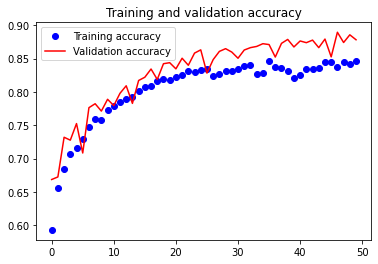

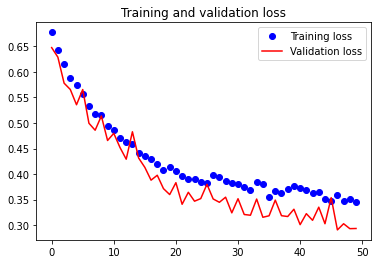

In [21]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy', color='r')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss', color='r')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Confusion Matrix and Classification Report

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [23]:
# flatten the true labels to 1D
print(valid_label)
valid_label = valid_label.flatten()
print(valid_label.shape)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]]
(3894,)


In [24]:
# extract the predicted probabilities, flatten the prediction to 1D
p_pred = fashion_model.predict(valid_X)
p_pred = p_pred.flatten()
print(p_pred.round(2))

[0.02 0.87 0.66 ... 0.04 0.94 0.97]


In [25]:
# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)
print(y_pred.shape)

[0 1 1 ... 0 1 1]
(3894,)


[[1562  341]
 [ 133 1858]]


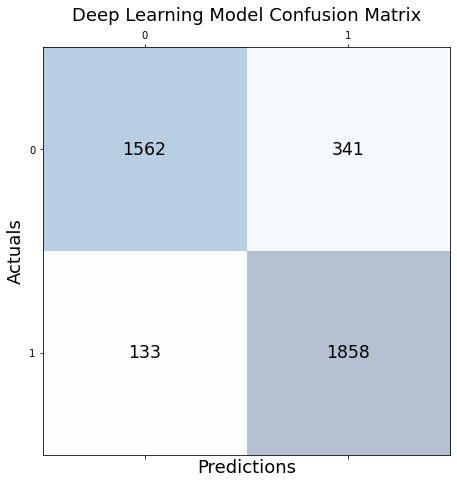

------------Classification Report----------
              precision    recall  f1-score   support

        fake       0.92      0.82      0.87      1903
        real       0.84      0.93      0.89      1991

    accuracy                           0.88      3894
   macro avg       0.88      0.88      0.88      3894
weighted avg       0.88      0.88      0.88      3894



<Figure size 432x288 with 0 Axes>

In [26]:
# confusion matrix
conf_matrix = confusion_matrix(valid_label, y_pred)
print(confusion_matrix(valid_label, y_pred))
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Deep Learning Model Confusion Matrix', fontsize=18)
plt.show()
plt.savefig('dp_confusion_matrix.png')

print("------------Classification Report----------")
target_names = ['fake', 'real']
print(classification_report(valid_label, y_pred, target_names=target_names))

# References
- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
- https://www.machinecurve.com/index.php/2020/04/05/how-to-find-the-value-for-keras-input_shape-input_dim/
- https://towardsdatascience.com/activation-functions-in-deep-neural-networks-aae2a598f211
- https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
- https://stackoverflow.com/questions/69875073/confusion-matrix-valueerror-classification-metrics-cant-handle-a-mix-of-binary

# Output

In [8]:
# should access the Google Drive files before running the chunk
#%%capture
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/Deepfake_Video_Classifier2.0/model_outcomes/nn_model
!pwd
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic 
!jupyter nbconvert --to pdf "/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/Deepfake_Video_Classifier2.0/code/07.Deep_Learning_Task.ipynb"

/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/Deepfake_Video_Classifier2.0/model_outcomes/nn_model
/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/Deepfake_Video_Classifier2.0/model_outcomes/nn_model
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-plain-generic is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/Deepfake_Video_Classifier2.0/code/07.Deep_Learning_Task.ipynb to pdf
[NbConvertApp] Support files will be in 07.Deep_Learning_Task_files/
[NbConvertApp] Making directory ./07.Deep_Learning_Task_files
[NbConvertApp]